In [1]:
# Question: What are the most important churn drivers?
# What are you going to do: feature importance(tree models)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x) # for supressing scientific notation

telco = pd.read_csv("/Users/selinalkan/Desktop/python projects/churn telcom/Churn.csv")

telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [3]:
telco.Churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [4]:
round(telco.describe(), 2)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000
mean,101.06000,8.10000,179.78000,200.98000,200.87000,10.24000,1.56000,100.44000,30.56000,100.11000,17.08000,100.11000,9.04000,4.48000,2.76000,437.18000
std,39.82000,13.69000,54.47000,50.71000,50.57000,2.79000,1.32000,20.07000,9.26000,19.92000,4.31000,19.57000,2.28000,2.46000,0.75000,42.37000
min,1.00000,0.00000,0.00000,0.00000,23.20000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,33.00000,1.04000,0.00000,0.00000,408.00000
25%,74.00000,0.00000,143.70000,166.60000,167.00000,8.50000,1.00000,87.00000,24.43000,87.00000,14.16000,87.00000,7.52000,3.00000,2.30000,408.00000
50%,101.00000,0.00000,179.40000,201.40000,201.20000,10.30000,1.00000,101.00000,30.50000,100.00000,17.12000,100.00000,9.05000,4.00000,2.78000,415.00000
75%,127.00000,20.00000,216.40000,235.30000,235.30000,12.10000,2.00000,114.00000,36.79000,114.00000,20.00000,113.00000,10.59000,6.00000,3.27000,510.00000
max,243.00000,51.00000,350.80000,363.70000,395.00000,20.00000,9.00000,165.00000,59.64000,170.00000,30.91000,175.00000,17.77000,20.00000,5.40000,510.00000


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

telco.groupby("Churn").agg(["mean","std"]).round(2)

Account_Length          Vmail_Message           Day_Mins           Eve_Mins          Night_Mins          Intl_Mins         CustServ_Calls         Day_Calls          Day_Charge          Eve_Calls          Eve_Charge         Night_Calls          Night_Charge         Intl_Calls         Intl_Charge         Area_Code         
                mean      std          mean      std      mean      std      mean      std       mean      std      mean     std           mean     std      mean      std       mean      std      mean      std       mean     std        mean      std         mean     std       mean     std        mean     std      mean      std
Churn                                                                                                                                                                                                                                                                                                                                   
no         100.79000 39.88000       8.60000 13.91000 175.18000 50.18000 199.04000 50.29000  200.13000 51.11000  10.16000 2.78000        1.45000 1.16000 100.28000 19.80000   29.78000  8.53000 100.04000 19.96000   16.92000 4.27000   100.06000 19.51000      9.01000 2.30000    4.53000 2.44000     2.74000 0.75000 437.07000 42.31000
yes        102.66000 39.47000       5.12000 11.86000 206.91000 69.00000 212.41000 51.73000  205.23000 47.13000  10.70000 2.79000        2.23000 1.85000 101.34000 21.58000   35.18000 11.73000 100.56000 19.72000   18.05000 4.40000   100.40000 19.95000      9.24000 2.12000    4.16000 2.55000     2.89000 0.75000 437.82000 42.79000

In [6]:
# PreProcessing

from sklearn.preprocessing import StandardScaler

#1. Dropping unnecessary features: Phone, Area_Code
prePro_s1 = telco.drop(["Phone", "Area_Code"], axis = 1)

In [7]:
#2. Split numerical and categorical features:
numeric = prePro_s1.select_dtypes('number')
categoric = prePro_s1.select_dtypes("object")

In [8]:
#3.1. Standardize numerical features:
numeric_scaled = StandardScaler().fit_transform(numeric)
numeric_df = pd.DataFrame(numeric_scaled, columns=numeric.columns)

In [9]:
#3.2. Encoding Categorical features
from sklearn.preprocessing import LabelEncoder 

categoric = categoric.drop(["State"], axis = 1) 

categoric_encoded = categoric.apply(LabelEncoder().fit_transform)

In [10]:
#3.3. Encoding State:
state_encoded = pd.get_dummies(telco["State"])

In [11]:
#4. putting them all together:
data = pd.concat([numeric_df, categoric_encoded, state_encoded], axis=1, join = "outer")

In [12]:
data.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,Intl_Plan,Vmail_Plan,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
count,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000
mean,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.14491,0.09691,0.27663,0.01560,0.02400,0.01650,0.01920,0.01020,0.01980,0.02220,0.01620,0.01830,0.01890,0.01620,0.01590,0.01320,0.02190,0.01740,0.02130,0.02100,0.01770,0.01530,0.01950,0.02100,0.01860,0.02190,0.02520,0.01890,0.01950,0.02040,0.02040,0.01860,0.01830,0.01680,0.02040,0.01860,0.01980,0.02490,0.02340,0.01830,0.02340,0.01350,0.01950,0.01800,0.01800,0.01590,0.02160,0.02160,0.02310,0.02190,0.01980,0.02340,0.03180,0.02310
std,1.00015,1.00015,1.00015,1.00015,1.00015,1.00015,1.00015,1.00015,1.00015,1.00015,1.00015,1.00015,1.00015,1.00015,1.00015,0.35207,0.29588,0.44740,0.12395,0.15308,0.12741,0.13725,0.10050,0.13934,0.14736,0.12627,0.13406,0.13620,0.12627,0.12511,0.11415,0.14639,0.13078,0.14441,0.14341,0.13188,0.12277,0.13830,0.14341,0.13513,0.14639,0.15676,0.13620,0.13830,0.14139,0.14139,0.13513,0.13406,0.12855,0.14139,0.13513,0.13934,0.15585,0.15120,0.13406,0.15120,0.11543,0.13830,0.13298,0.13298,0.12511,0.14540,0.14540,0.15025,0.14639,0.13934,0.15120,0.17550,0.15025
min,-2.51317,-0.59176,-3.30110,-3.96362,-3.51365,-3.66741,-1.18822,-5.00525,-3.30116,-5.02591,-3.96368,-3.42987,-3.51537,-1.82029,-3.66821,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,-0.67974,-0.59176,-0.66242,-0.67803,-0.66985,-0.62237,-0.42793,-0.66957,-0.66238,-0.65836,-0.67831,-0.66993,-0.66768,-0.60120,-0.61643,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,-0.00163,-0.59176,-0.00689,0.00828,0.00649,0.02246,-0.42793,0.02812,-0.00673,-0.00574,0.00846,-0.00551,0.00469,-0.19483,0.02046,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,0.65137,0.86955,0.67252,0.67683,0.68085,0.66730,0.3

In [20]:
# Train-Test Split

# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = data.drop('Churn', axis=1)

# Create target variable
y = data['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3\
                                                    ,stratify = y, random_state = 123)
## traintestsplitte stratify diye bişi var onu kullancan. çünkü churn grubu çok orantısız dağınık.

# Check each sets length
print(X_train.shape)
print(X_test.shape)

# check proportion of Churn in 2 groups
print(y_train.mean())
print(y_test.mean())

(2333, 68)
(1000, 68)
0.14487783969138449
0.145


In [21]:
#%% First RF Model

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf_rf = RandomForestClassifier(random_state=123)

# Fit to the training data
clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

In [27]:
#%% metrics

### Compute accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))

### Precision_score
from sklearn.metrics import precision_score

# Print the precision_score
print("Precision: ", precision_score(y_test, y_pred))

### recall_score
from sklearn.metrics import recall_score

# Print the recall
print("Recall: ", recall_score(y_test, y_pred))

### f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print("F1 Score: ", f1_score(y_test, y_pred))

### Confusion matrix
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print("Confusion Martix: ", "\n", confusion_matrix(y_test, y_pred))

Accuracy:  0.934
Precision:  0.9247311827956989
Recall:  0.593103448275862
F1 Score:  0.722689075630252
Confusion Martix:  
 [[848   7]
 [ 59  86]]


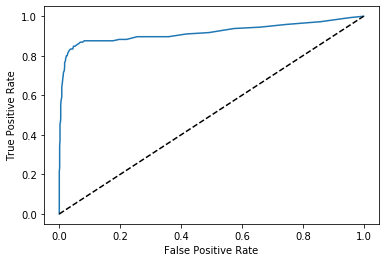

AUC Score:  0.918076225045372


In [29]:
### ROC curve

# Generate the probabilities
y_pred_prob = clf_rf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

### AUC

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print("AUC Score: ", roc_auc_score(y_test, y_pred_prob))

In [ ]:
#%% hyperparameter Tuning